In [1]:
import pandas as pd

In [75]:
viajes = pd.read_csv('../data/recorridos-realizados-2019_muestra.csv')
viajes['id_estacion'] = pd.to_numeric(viajes.id_estacion_origen\
                                     .str.replace('_','.'))
viajes.head()

,id_usuario,fecha_origen_recorrido,duracion_recorrido,nombre_estacion_origen,id_estacion_origen,nombre_estacion_destino,id_estacion_destino,genero_usuario,edad_usuario,fecha_destino_recorrido,id_estacion
0,5276,2019-05-30 17:24:55,0 days 00:03:36.000000000,189 - Posadas,189,001 - Facultad De Derecho,202,NaN,NaN,2019-05-30 17:28:31,189.0
1,313562,2019-07-31 20:34:55,0 days 00:22:48.000000000,225 - Hospital Tornu,428.0,207 - Plaza Arenales,336.0,NaN,NaN,2019-07-31 20:57:43,428.0
2,106940,2019-04-26 06:21:13,0 days 00:16:38.000000000,004 - Plaza Roma,4,096 - Carlos Gardel,96,NaN,NaN,2019-04-26 06:37:51,4.0
3,367354,2019-07-11 08:25:01,0 days 00:23:31.000000000,243 - Plazoleta Celedonio Flores,229.0,005 - Plaza Italia,5.0,NaN,NaN,2019-07-11 08:48:32,229.0
4,321077_0,2019-01-07 00:43:53,0 days 00:11:00.000000000,Padilla,31_0,Guayaquil,87_0,MASCULINO,26.0,2019-01-07 00:54:53,31.0


In [76]:
tabla = viajes.groupby('id_estacion').size().reset_index()
tabla = tabla.rename(columns = {'id_estacion':'id_estacion',
                       0:'n_viajes'})
tabla

,id_estacion,n_viajes
0,1.0,4
1,2.0,66
2,3.0,18
3,4.0,40
4,5.0,87
...,...,...
417,442.0,4
418,443.0,13
419,444.0,47
420,448.0,2


In [77]:
import geopandas as gpd

In [78]:
estaciones = pd.read_csv('../carto/estaciones-bicicletas.csv')
estaciones = estaciones.reindex(columns = ['lat','long','nombre_estacion','id_estacion'])
estaciones.head()

,lat,long,nombre_estacion,id_estacion
0,-34.592423,-58.374715,002 - Retiro I,2
1,-34.611032,-58.368260,003 - ADUANA,3
2,-34.601726,-58.368763,004 - Plaza Roma,4
3,-34.580550,-58.420954,005 - Plaza Italia,5
4,-34.628526,-58.369758,006 - Parque Lezama,6


In [79]:
from shapely.geometry import Point

In [80]:
def crear_punto(lat,long):
    return Point(long,lat)

In [81]:
estaciones.lat.iloc[0]

-34.59242329999999

In [82]:
estaciones.long.iloc[0]

-58.37471510000001

In [83]:
estaciones.head(2)

,lat,long,nombre_estacion,id_estacion
0,-34.592423,-58.374715,002 - Retiro I,2
1,-34.611032,-58.368260,003 - ADUANA,3


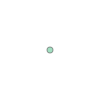

In [84]:
crear_punto(lat = estaciones.lat.loc[15],long=estaciones.long.loc[15])

In [85]:
puntos = []
for indice in estaciones.index:
    punto = crear_punto(lat = estaciones.lat.loc[indice],
                        long=estaciones.long.loc[indice])
    puntos.append(punto)

In [86]:
estaciones['geometry']=puntos

In [87]:
#lo convertimos en GeoDataFrame indicando que columnas almacena los objetos geograficos
#y en queproyeccion estaban originalmente
estaciones_geo = gpd.GeoDataFrame(estaciones, geometry='geometry',crs={'init' :'epsg:4326'})
estaciones_geo.head()

,lat,long,nombre_estacion,id_estacion,geometry
0,-34.592423,-58.374715,002 - Retiro I,2,POINT (-58.37472 -34.59242)
1,-34.611032,-58.368260,003 - ADUANA,3,POINT (-58.36826 -34.61103)
2,-34.601726,-58.368763,004 - Plaza Roma,4,POINT (-58.36876 -34.60173)
3,-34.580550,-58.420954,005 - Plaza Italia,5,POINT (-58.42095 -34.58055)
4,-34.628526,-58.369758,006 - Parque Lezama,6,POINT (-58.36976 -34.62853)


In [88]:
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:
estaciones_geo.head(2)

,lat,long,nombre_estacion,id_estacion,geometry
0,-34.592423,-58.374715,002 - Retiro I,2,POINT (-58.37472 -34.59242)
1,-34.611032,-58.368260,003 - ADUANA,3,POINT (-58.36826 -34.61103)


In [90]:
tabla

,id_estacion,n_viajes
0,1.0,4
1,2.0,66
2,3.0,18
3,4.0,40
4,5.0,87
...,...,...
417,442.0,4
418,443.0,13
419,444.0,47
420,448.0,2


In [91]:
estaciones_geo = pd.merge(estaciones_geo, tabla,
         on = 'id_estacion',
         how = 'inner'
        )
estaciones_geo.head()

,lat,long,nombre_estacion,id_estacion,geometry,n_viajes
0,-34.592423,-58.374715,002 - Retiro I,2,POINT (-58.37472 -34.59242),66
1,-34.611032,-58.368260,003 - ADUANA,3,POINT (-58.36826 -34.61103),18
2,-34.601726,-58.368763,004 - Plaza Roma,4,POINT (-58.36876 -34.60173),40
3,-34.580550,-58.420954,005 - Plaza Italia,5,POINT (-58.42095 -34.58055),87
4,-34.628526,-58.369758,006 - Parque Lezama,6,POINT (-58.36976 -34.62853),75


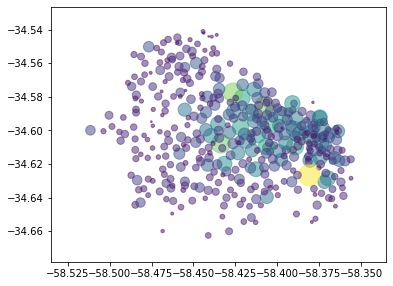

In [100]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
estaciones_geo.plot(ax=ax,
                   column = 'n_viajes',
                   markersize = estaciones_geo.n_viajes * 3,
                    alpha = 0.5)

In [ ]:
#creamos un viaje agrupando por origen como destino, lo que nos da el par Origen-Destino de un viaje
viajes = dt.reindex(columns = ['id_estacion_origen','id_estacion_destino','id_usuario'])\
                    .groupby(['id_estacion_origen','id_estacion_destino']).count().reset_index()
viajes.columns = ['id_estacion_origen','id_estacion_destino','n']
viajes.sort_values(by='n',ascending=False).head(3)